In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/sample_submission.csv
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/train.csv
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/test.csv
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4515480.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4517890.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4517724.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4518419.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_7767967.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4537730.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4637585.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_4535651.jpg
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/img_7764741.

## Loading required packages

## Loading training data

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from keras.models import Model
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.optimizers import Adam

In [2]:
df = pd.read_csv('../input/fast-furious-and-insured/Fast_Furious_Insured/train.csv')
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


## Loading testing data

In [3]:
df_test = pd.read_csv('../input/fast-furious-and-insured/Fast_Furious_Insured/test.csv')
df_test

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.00
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.00
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.00
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.00
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.00
...,...,...,...,...,...,...
595,img_7766518.jpg,B,30900,772.5,2024-10-23,7803.00
596,img_4535713.jpg,O,51300,1282.5,2025-02-21,12903.00
597,img_4511787.jpg,BQ,27000,675.0,2023-07-13,23527.68
598,img_4517592.jpg,AA,42600,1065.0,2024-05-05,10728.00


EDA

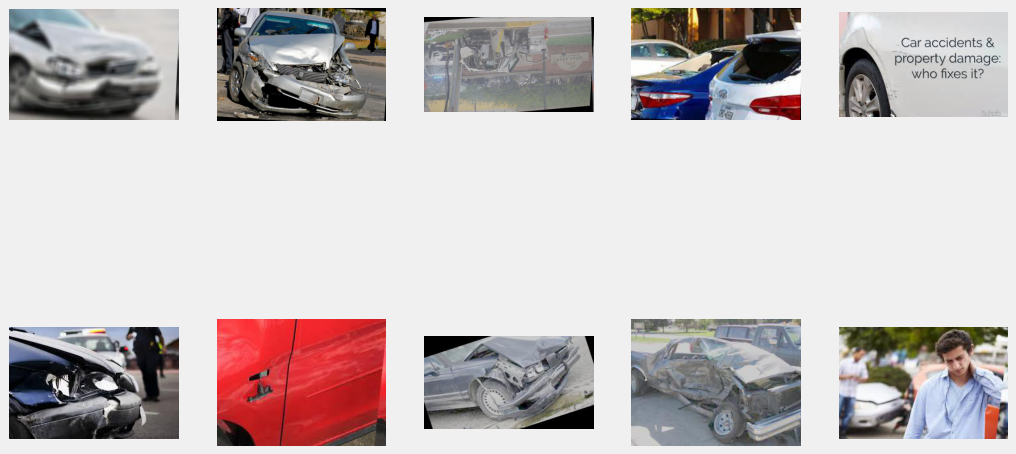

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
path = '../input/fast-furious-and-insured/Fast_Furious_Insured/trainImages/'
for i,im in enumerate(df[df['Condition'] == 1]['Image_path']):
    plt.subplot(2,5,i+1)
    img = plt.imread(path+str(im))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i+=1
    if i == 10:
        break
plt.show()

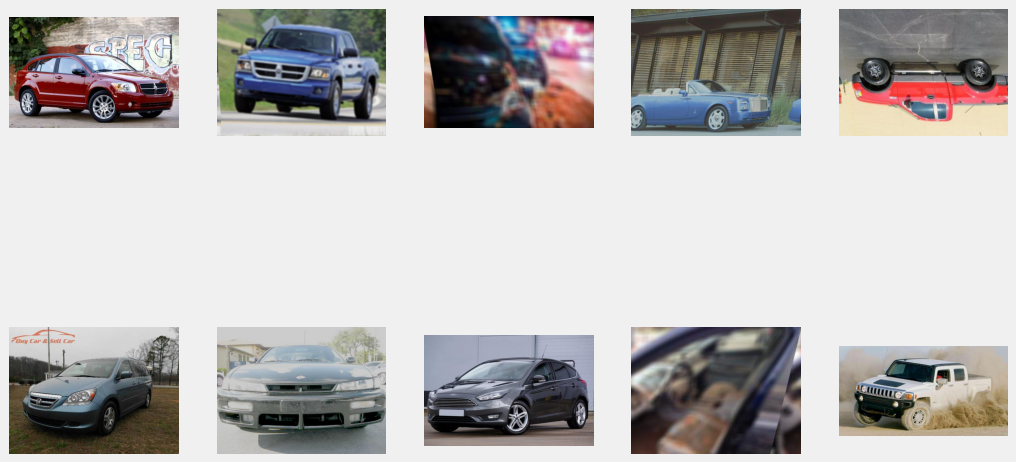

In [7]:
## Let's have a look at some of the Non-damaged vehicles

path = '../input/fast-furious-and-insured/Fast_Furious_Insured/trainImages/'
for i,im in enumerate(df[df['Condition'] == 0]['Image_path']):
    plt.subplot(2,5,i+1)
    img = plt.imread(path+str(im))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i+=1
    if i == 10:
        break
plt.show()


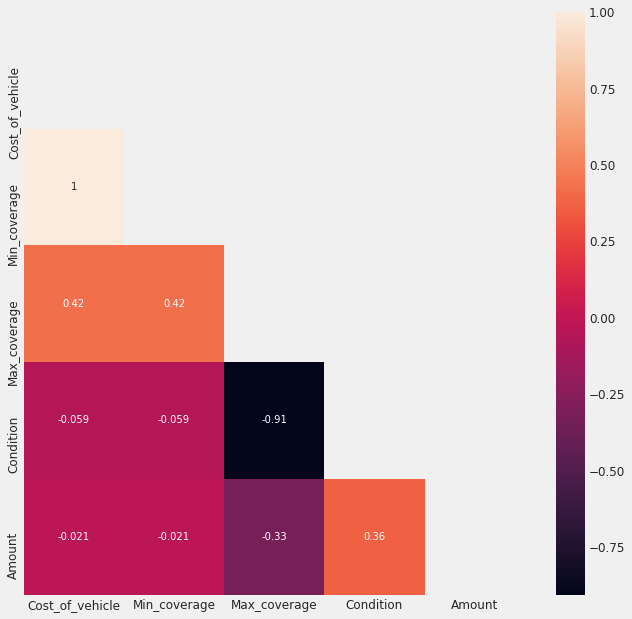

In [8]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

<AxesSubplot:>

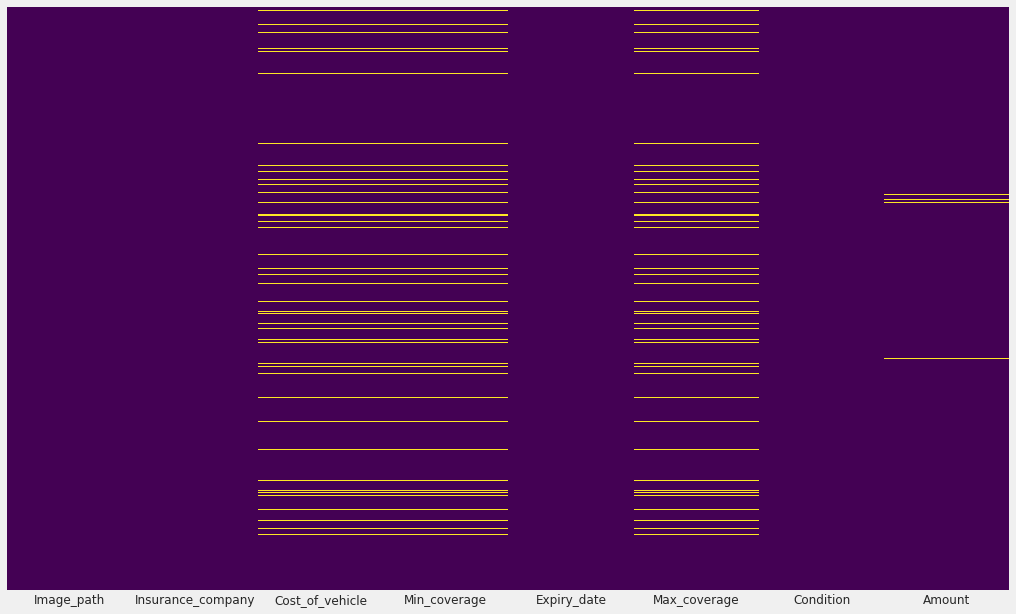

In [9]:
## Showing which feature got missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

<AxesSubplot:>

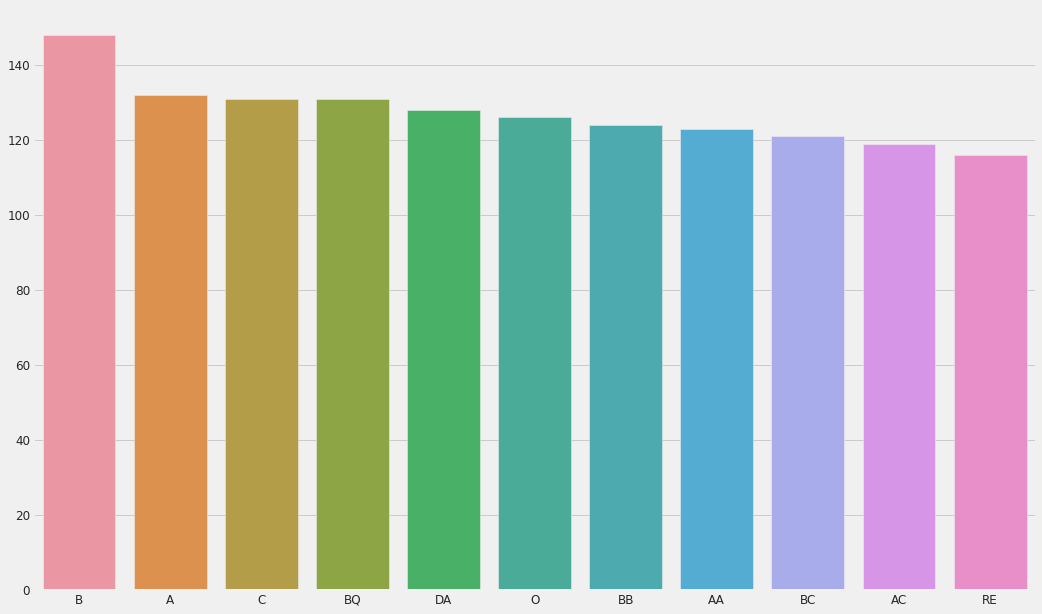

In [10]:
x = list(df['Insurance_company'].value_counts().keys())
y = df['Insurance_company'].value_counts().values
sns.barplot(x= x,y=y)

<AxesSubplot:ylabel='Density'>

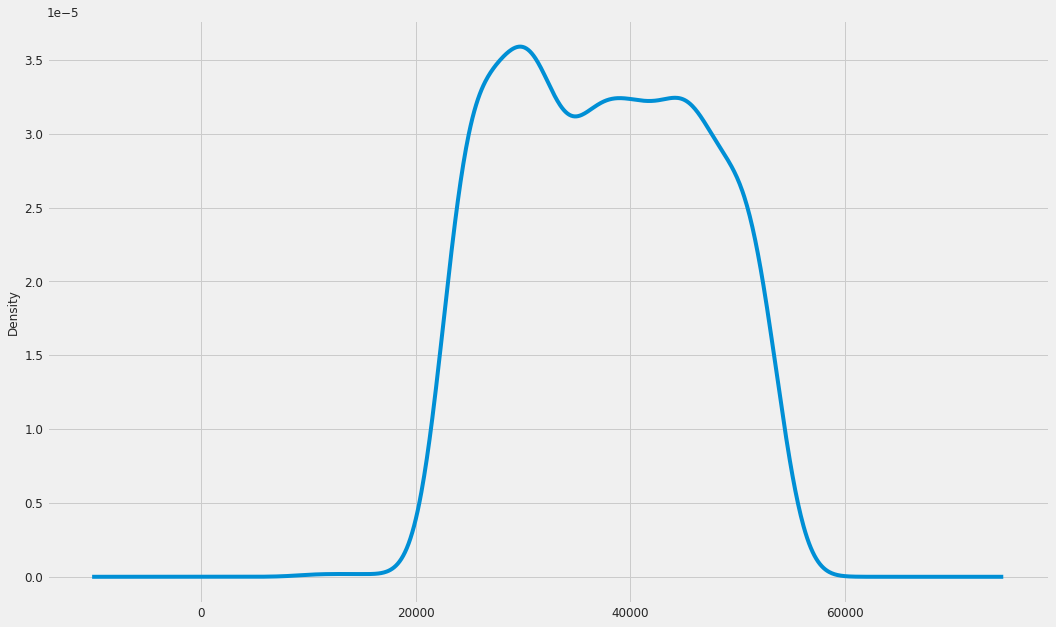

In [11]:
df['Cost_of_vehicle'].plot(kind='kde')

<AxesSubplot:xlabel='Max_coverage', ylabel='Amount'>

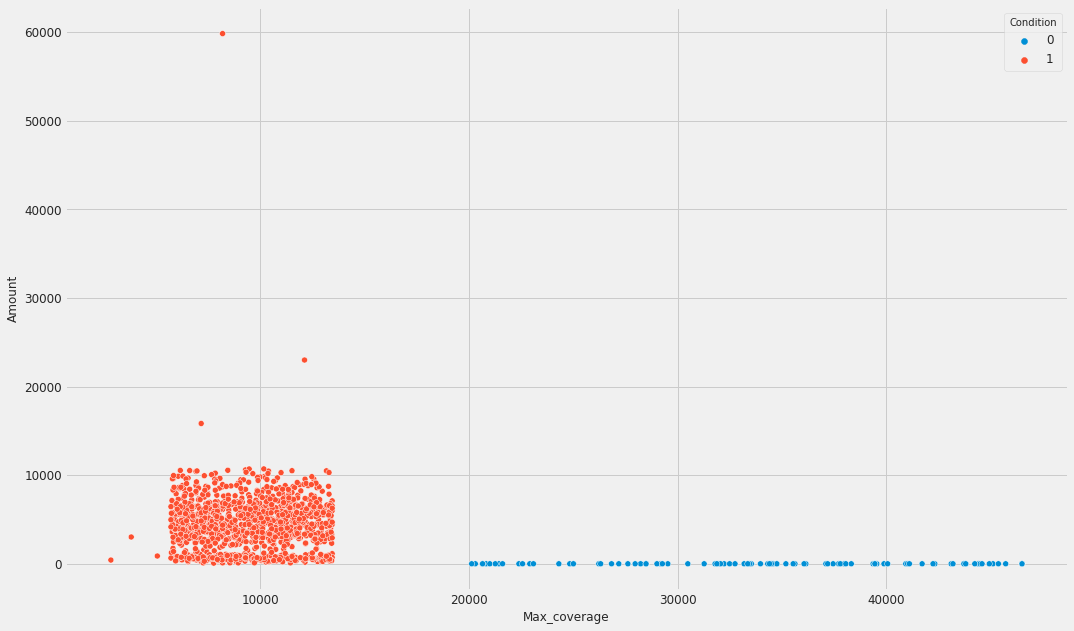

In [12]:
## scatterplot between feature 'Max_coverage' ,and feature 'Amount' with label of feature 'Condition'
sns.scatterplot(x ='Max_coverage' ,y='Amount',hue='Condition',data=df)

<AxesSubplot:xlabel='Condition', ylabel='Amount'>

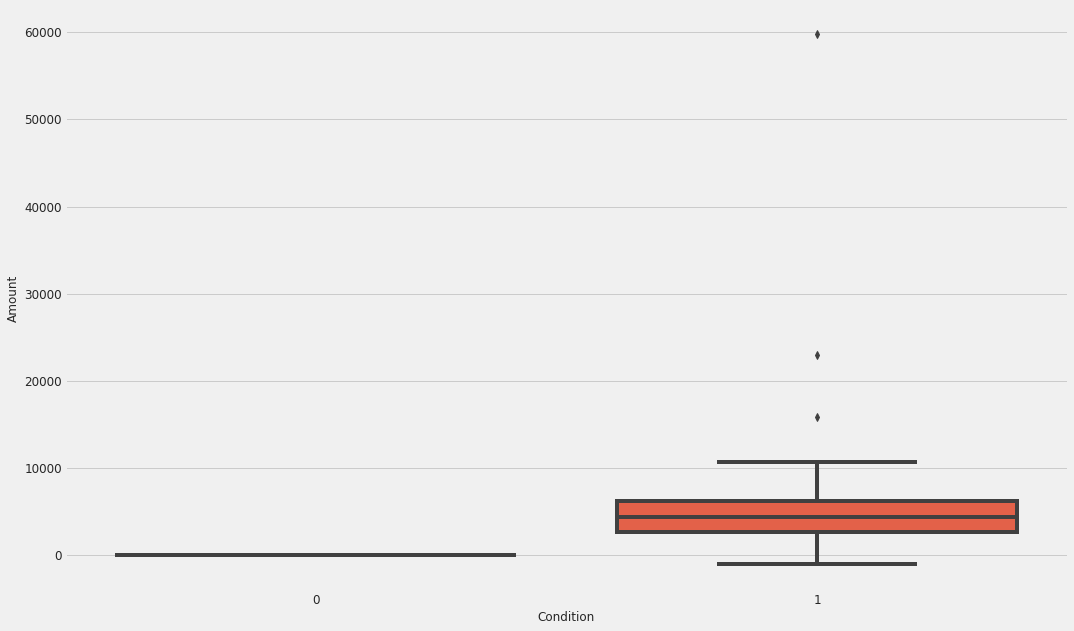

In [13]:
sns.boxplot(y='Amount',x='Condition',data=df)

<AxesSubplot:>

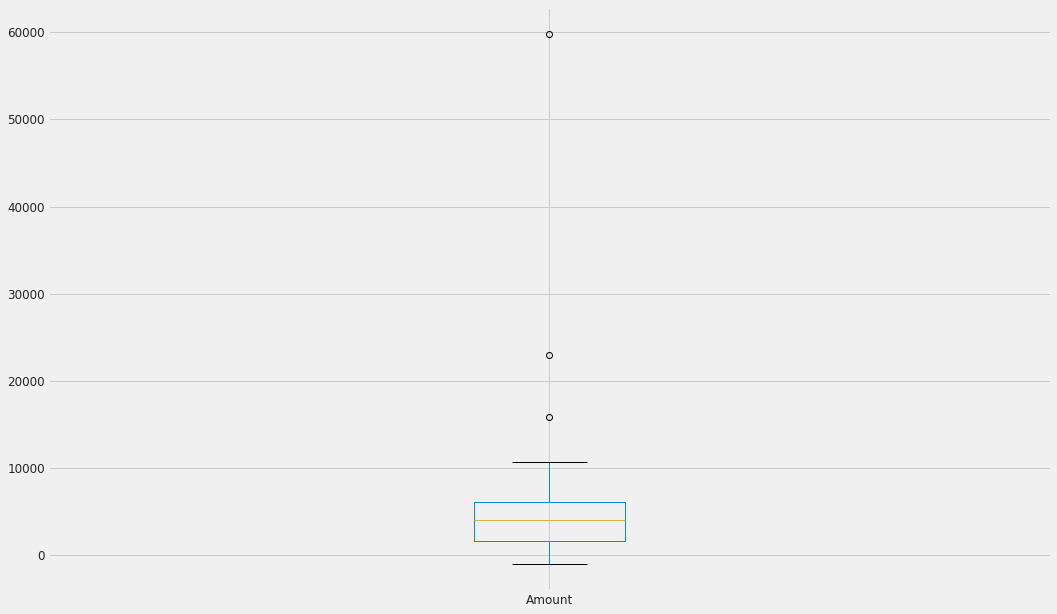

In [14]:
df['Amount'].plot(kind='box')

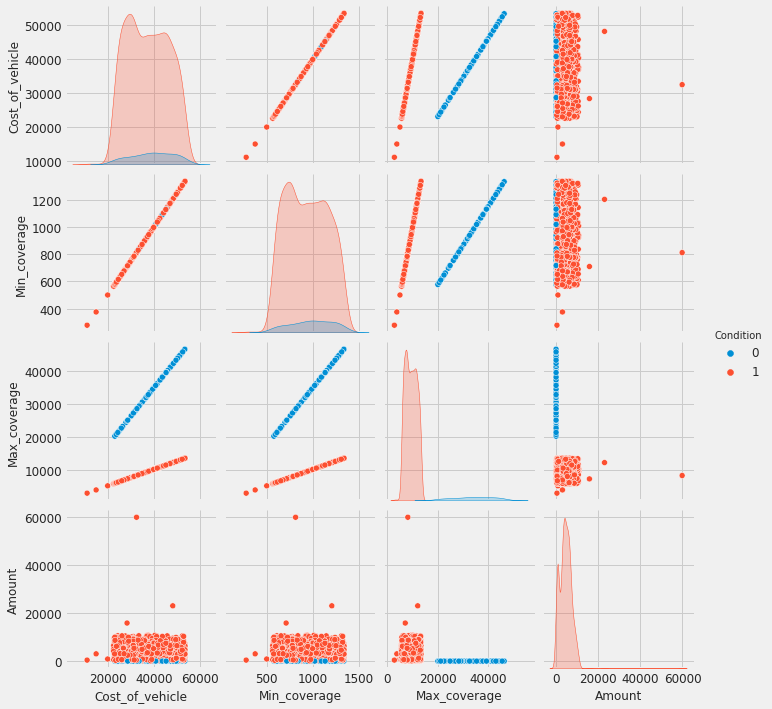

In [15]:
sns.pairplot(df,diag_kind='kde',hue='Condition')

In [17]:
## Separating damaged vehicles data



target_df = df[df['Condition'] == 1]
target_df.index = range(target_df.shape[0])
target_df

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_7764995.jpg,BQ,50700.00,1267.50,2025-07-10,12753.00,1,6194.00
1,img_7768372.jpg,A,33500.00,837.50,2022-08-02,8453.00,1,7699.00
2,img_7765274.jpg,AC,27600.00,690.00,2026-05-01,6978.00,1,8849.00
3,img_4537770.jpg,AC,50700.00,1267.50,2026-08-07,12753.00,1,253.00
4,img_7765649.jpg,AC,53200.00,1330.00,2028-01-12,13378.00,1,4013.00
...,...,...,...,...,...,...,...,...
1295,img_4637237.jpg,DA,52300.00,1307.50,2025-02-17,13153.00,1,4565.00
1296,img_4637000.jpg,BQ,41500.00,1037.50,2023-12-30,10453.00,1,3363.00
1297,img_4637503.jpg,AA,31400.00,785.00,2022-11-25,7928.00,1,5336.00
1298,img_4515101.jpg,A,33200.00,830.00,2022-10-10,8378.00,1,8734.00


<AxesSubplot:>

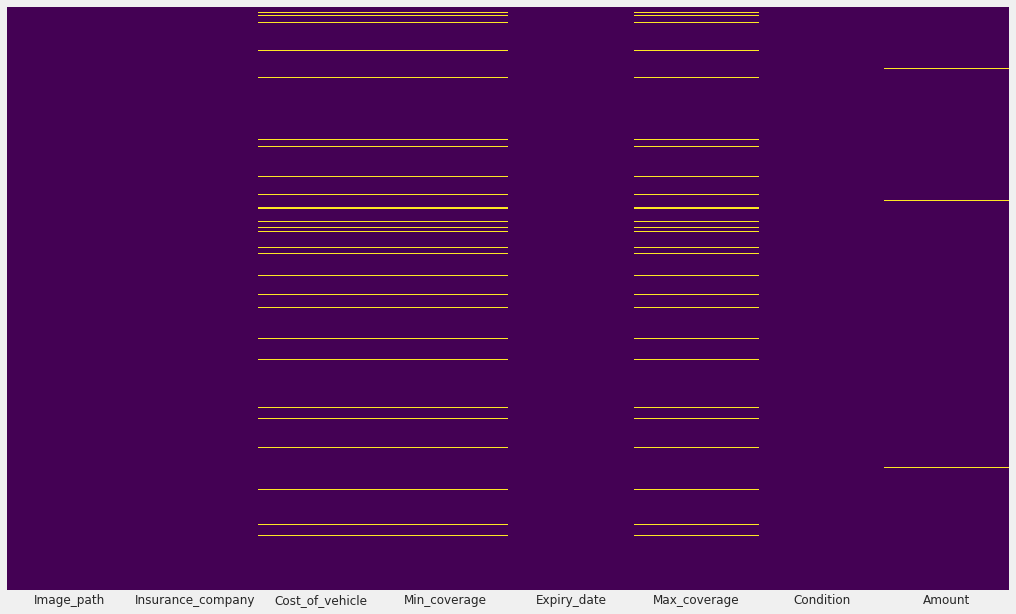

In [18]:
## Visulaizing the missing values

sns.heatmap(target_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

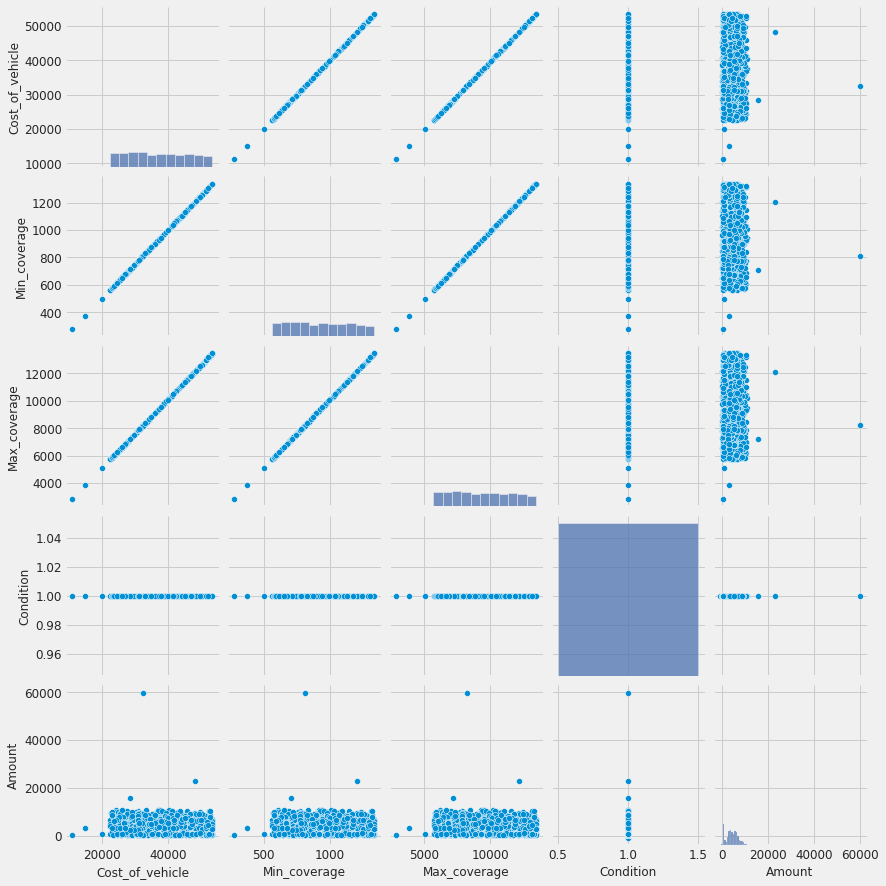

In [19]:
sns.pairplot(target_df)

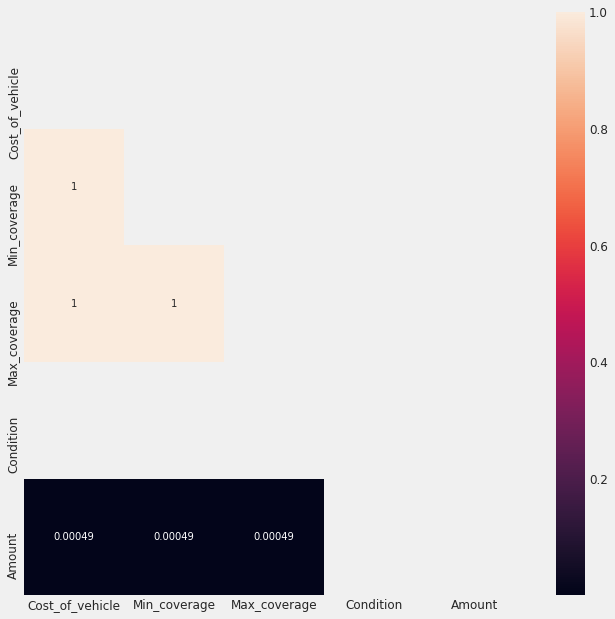

In [20]:
corr = target_df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

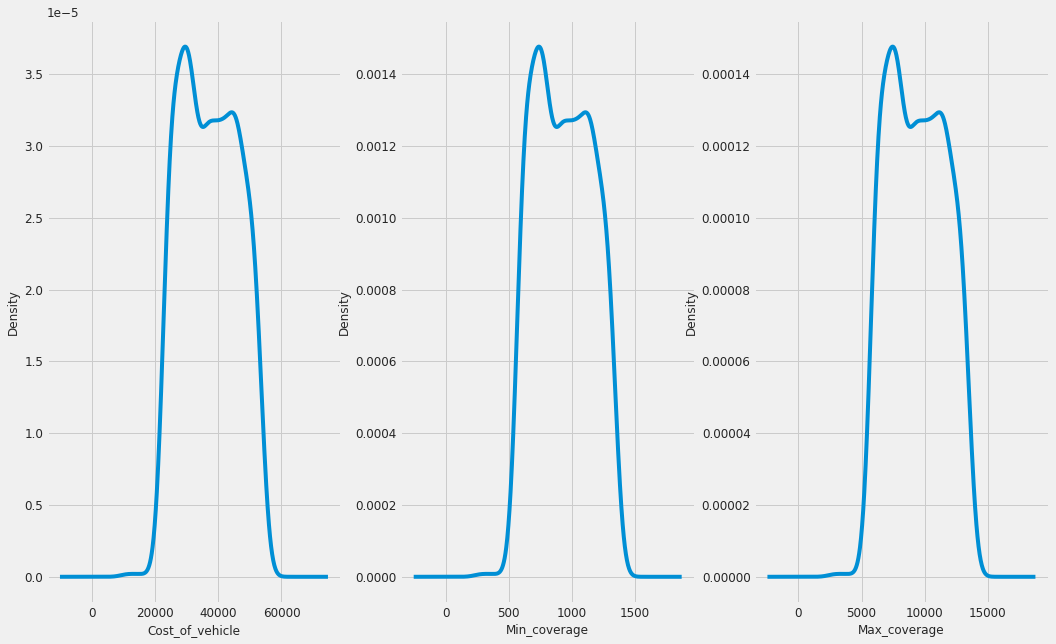

In [21]:
plt.figure()
ax0 = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2)
ax2 = plt.subplot(1,3,3)
target_df['Cost_of_vehicle'].plot(kind='kde',ax=ax0)
ax0.set_xlabel('Cost_of_vehicle')
target_df['Min_coverage'].plot(kind='kde',ax=ax1)
ax1.set_xlabel('Min_coverage')
target_df['Max_coverage'].plot(kind='kde',ax=ax2)
ax2.set_xlabel('Max_coverage')
plt.show()

<AxesSubplot:>

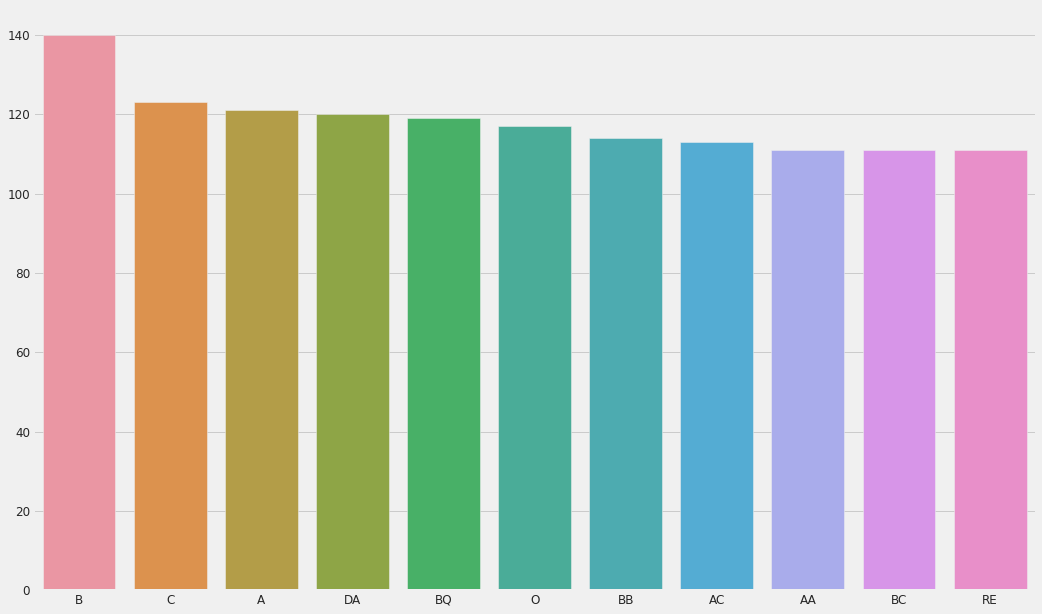

In [22]:
x = list(target_df['Insurance_company'].value_counts().keys())
y = target_df['Insurance_company'].value_counts().values
sns.barplot(x= x,y=y)

## Pre-processing

In [4]:
# Get the number of missing data points per column
missing_values_count_train = df.isnull().sum()
print(missing_values_count_train)

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64


In [ ]:
# Get the number of missing data points per column
missing_values_count_test = df_test.isnull().sum()
print(missing_values_count_test)

In [ ]:
# Filling missing values
df = df.fillna(method='bfill', axis=0).fillna(0)

In [ ]:
# Checking different values in Insurance company in the training set
df['Insurance_company'].value_counts()

In [ ]:
# Checking different values in Insurance company in the testing set
df_test['Insurance_company'].value_counts()

# Label encoding and scaling

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from keras.models import Model
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.optimizers import Adam
features_num = ['Cost_of_vehicle', 'Min_coverage', 'Max_coverage']
features_cat = ['Insurance_company']

le= LabelEncoder()   
df['Insurance_company'] = le.fit_transform(df['Insurance_company'])
df_test['Insurance_company'] = le.transform(df_test['Insurance_company'])

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

y = df['Amount']
train_imputed = df.loc[:,['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'Insurance_company']]
X = preprocessor.fit_transform(train_imputed)

test_imputed = df_test.loc[:,['Cost_of_vehicle', 'Min_coverage',  'Max_coverage', 'Insurance_company']]
test_X = preprocessor.transform(test_imputed)

train_imputed.columns

In [ ]:
#Train-test split
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1,test_size=0.2)

## Train a random forest regressor

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators = 1000, max_depth=3)
# fit your model
rf_model.fit(train_X,train_y)
val_preds = rf_model.predict(val_X)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y,val_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

## Get the predictions for amount

In [ ]:
amount_predictions = rf_model.predict(test_X)

## Prepare the images

In [ ]:
X = df.loc[:,['Image_path']]
y = df.loc[:,['Condition']]    
X_test = df.loc[:,['Image_path']]
print('train set shape:', X.shape)
print('test set shape:', X_test.shape)

In [ ]:
data = []
labels = []
for (index_label, row_series) in df.iterrows():
        img_path = row_series.values[0]
        condition = row_series.values[-2]
        labels.append(int(condition))
        # load the image, pre-process it, and store it in the data list
        originalImage = cv2.imread('/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/trainImages/' + img_path)
        image = cv2.resize(originalImage, (224, 224))
        image = img_to_array(image)
        data.append(image)

## Transfer learning with MobileNet

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
   # we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:80]:
    layer.trainable=False
for layer in model.layers[80:]:
    layer.trainable=True

In [ ]:
from tensorflow.keras import optimizers

print(len(data),len(labels))
data = np.array(data, dtype="float")
labels = np.array(labels)
    
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(train_images, test_images, train_labels, test_labels) = train_test_split(data,labels, test_size=0.2, random_state=42)

#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = (train_images / 255.0)-0.5, (test_images / 255.0) -0.5

train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

#compile and train the model
adam=optimizers.Adam(
                lr=0.002,
                beta_1=0.9,
                beta_2=0.999,
                epsilon=None,
                decay=0.0001,
                amsgrad=False
                )

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#callback = callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_images, train_labels, batch_size=32,epochs=5,shuffle=True, validation_data=(test_images, test_labels))

## Getting the test prediction

In [ ]:
condition_predictions = []
for (index_label, row_series) in df_test.iterrows():
        img_path = row_series.values[0]
        # load the image, pre-process it, and store it in the data list
        originalImage = cv2.imread('/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages/' + img_path)
        image = cv2.resize(originalImage, (224, 224))
        image = img_to_array(image)
        image = image.reshape((1,224, 224, 3))
        image = np.array(image, dtype="float") / 255.0 - 0.5
        prediction = model.predict(image)
        prediction = prediction[0]
        condition_predictions.append(np.argmax(prediction))
       

## Preparing the submission

In [ ]:
submission = pd.DataFrame({'Image_path': df_test.Image_path, 'Condition': condition_predictions, 
                          'Amount': amount_predictions})
submission.to_csv('submission.csv', index=False)
from IPython.display import FileLink
FileLink('submission.csv')
